In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_train = pd.read_csv("titanic/train.csv")

In [3]:
survivor_table = pd.pivot_table(titanic_train, index=["Sex"], values=["Survived"])

In [4]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [5]:
survivor_table

,Survived
Sex,
female,0.742038
male,0.188908


In [6]:
def create_age_range(age):
    if age == "NaN":
        return "unknown"
    if age <= 18:
        return "child"
    if age > 18:
        return "adult"

In [7]:
def create_fare_range(fare):
    if fare < 10:
        return "< 10"
    if fare >= 10 and fare < 20:
        return "10 to 20"
    if fare >= 20 and fare < 30:
        return "20 to 30"
    if fare >= 30 and fare < 40:
        return "30 to 40"
    if fare >= 40:
        return ">= 40"

In [8]:
titanic_train["Age_range"] = titanic_train["Age"].map(create_age_range)
titanic_train["Fare_range"] = titanic_train["Fare"].map(create_fare_range)

In [9]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range,Fare_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,adult,< 10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,adult,>= 40
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,adult,< 10
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,adult,>= 40
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,adult,< 10


In [18]:
survivor_table = pd.pivot_table(titanic_train, index=["Sex", "Age_range", "Pclass", "Fare_range", "Embarked"], values=["Survived"])

In [19]:
survivor_table

Survived
Sex    Age_range Pclass Fare_range Embarked          
female adult     1      20 to 30   C         0.500000
                                   S         1.000000
                        30 to 40   C         1.000000
                                   S         1.000000
                        >= 40      C         1.000000
                                   Q         1.000000
                                   S         0.968750
                 2      10 to 20   C         1.000000
                                   Q         1.000000
                                   S         0.888889
                        20 to 30   C         1.000000
                                   S         0.869565
                        30 to 40   S         1.000000
                        >= 40      C         1.000000
                                   S         1.000000
                 3      10 to 20   C         0.666667
                                   Q         0.000000
                                   S         0.538462
                        20 to 30   Q         0.000000
                                   S         0.333333
                        30 to 40   S         0.200000
                        < 10       Q         0.500000
                                   S         0.440000
                        >= 40      S         0.000000
       child     1      30 to 40   S         1.000000
                        >= 40      C         1.000000
                                   S         0.833333
                 2      10 to 20   C         1.000000
                                   S         1.000000
                        20 to 30   S         1.000000
...                                               ...
male   adult     2      20 to 30   C         0.000000
                                   S         0.052632
                        30 to 40   C         0.000000
                                   S         0.000000
                        >= 40      C         0.000000
                                   S         0.000000
                 3      10 to 20   C         0.500000
                                   Q         0.000000
                                   S         0.000000
                        20 to 30   S         0.000000
                        30 to 40   S         0.000000
                        < 10       C         0.187500
                                   Q         0.111111
                                   S         0.123288
                        >= 40      S         0.750000
       child     1      >= 40      C         0.500000
                                   S         1.000000
                 2      10 to 20   S         0.428571
                        20 to 30   S         0.750000
                        30 to 40   C         1.000000
                                   S         1.000000
                        >= 40      S         0.000000
                 3      10 to 20   C         0.500000
                                   S         0.800000
                        20 to 30   Q         0.000000
                                   S         0.285714
                        30 to 40   S         0.111111
                        < 10       C         0.333333
                                   S         0.117647
                        >= 40      S         0.000000

[82 rows x 1 columns]

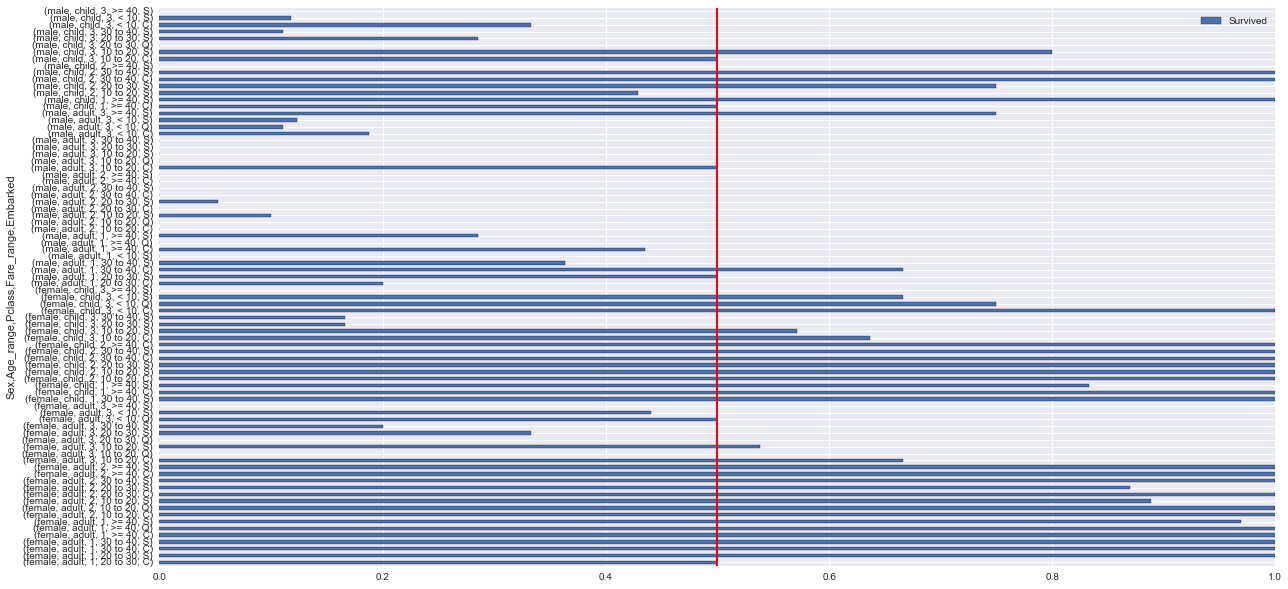

In [22]:
survivor_table.plot(kind="barh", figsize = (20,10))
plt.axvline(x=0.5, linewidth=2, color='r')
plt.show()

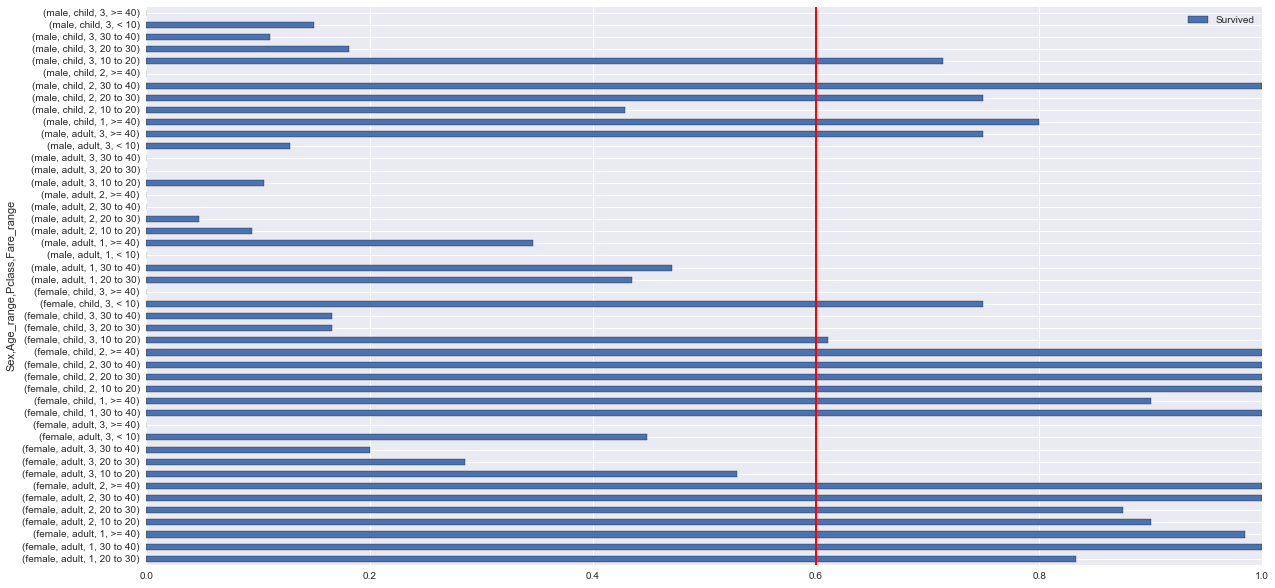

In [13]:
survivor_table.plot(kind="barh", figsize = (20,10))
plt.axvline(x=0.6, linewidth=2, color='r')
plt.show()

In [14]:
acgf = pd.read_csv("titanic/test.csv")
acgf["Age_range"] = acgf["Age"].map(create_age_range)
acgf["Fare_range"] = acgf["Fare"].map(create_fare_range)
acgf["Survived"] = 0

In [15]:
acgf.loc[(acgf["Sex"] == "male") & (acgf["Age_range"] == "child") & (acgf["Pclass"] == 3) & 
         (acgf["Fare_range"] == "10 to 20"), "Survived"] = 1
acgf.loc[(acgf["Sex"] == "male") & (acgf["Age_range"] == "child") & (acgf["Pclass"] == 2) & 
         (acgf["Fare_range"] == "30 to 40"), "Survived"] = 1
acgf.loc[(acgf["Sex"] == "male") & (acgf["Age_range"] == "child") & (acgf["Pclass"] == 2) & 
         (acgf["Fare_range"] == "20 to 30"), "Survived"] = 1
acgf.loc[(acgf["Sex"] == "male") & (acgf["Age_range"] == "child") & (acgf["Pclass"] == 1) & 
         (acgf["Fare_range"] == ">= 40"), "Survived"] = 1
acgf.loc[(acgf["Sex"] == "male") & (acgf["Age_range"] == "adult") & (acgf["Pclass"] == 3) & 
         (acgf["Fare_range"] == ">= 40"), "Survived"] = 1
acgf.loc[(acgf["Sex"] == "female") & (acgf["Age_range"] == "child") & (acgf["Pclass"] == 3) & 
         (acgf["Fare_range"] == "< 10"), "Survived"] = 1
acgf.loc[(acgf["Sex"] == "female") & (acgf["Age_range"] == "child") & (acgf["Pclass"] == 3) & 
         (acgf["Fare_range"] == "10 to 20"), "Survived"] = 1
acgf.loc[(acgf["Sex"] == "female") & (acgf["Age_range"] == "child") & (acgf["Pclass"] == 2), "Survived"] = 1
acgf.loc[(acgf["Sex"] == "female") & (acgf["Age_range"] == "child") & (acgf["Pclass"] == 1), "Survived"] = 1
acgf.loc[(acgf["Sex"] == "female") & (acgf["Age_range"] == "adult") & (acgf["Pclass"] == 2), "Survived"] = 1
acgf.loc[(acgf["Sex"] == "female") & (acgf["Age_range"] == "adult") & (acgf["Pclass"] == 1), "Survived"] = 1

In [17]:
acgf = acgf[["PassengerId", "Survived"]]
acgf.to_csv("titanic/age_gender_class_fare.csv", index=False)